In [26]:
import pandas as pd
dataframe=pd.read_csv("datatset_consumer_complaints.csv")
dataframe.head()  #shows fisrt 5 rows

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year,QTR (US FLY)
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015,Q4
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014,Q1
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014,Q4
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,WA,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015,Q1
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,VA,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015,Q4


In [27]:
dataframe.tail     #shows last 5 rows     

<bound method NDFrame.tail of             ID                                 Company  \
0      1615767                            PHH Mortgage   
1       654223                                   Ocwen   
2      1143398          Southwest Credit Systems, L.P.   
3      1303679        Continental Finance Company, LLC   
4      1627370                                Experian   
...        ...                                     ...   
13995  1778257          Financial Credit Service, Inc.   
13996   564605                                Experian   
13997   527989                          BB&T Financial   
13998  1883814                     Synchrony Financial   
13999  1893702  TransUnion Intermediate Holdings, Inc.   

                       Product                                     Issue  \
0                     Mortgage  Loan servicing, payments, escrow account   
1                     Mortgage  Loan servicing, payments, escrow account   
2              Debt collection  Loan modifica

In [28]:
dataframe.shape         #shows dimension of dataset

(14000, 16)

In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0    ID                       14000 non-null  int64 
 1   Company                   14000 non-null  object
 2   Product                   14000 non-null  object
 3   Issue                     14000 non-null  object
 4   State                     13890 non-null  object
 5   Submitted via             14000 non-null  object
 6   Date received             14000 non-null  object
 7   Date resolved             14000 non-null  object
 8   Timely response?          14000 non-null  object
 9   Consumer disputed?        14000 non-null  object
 10  state name                13843 non-null  object
 11  Date received.1           14000 non-null  object
 12  Date resolved.1           14000 non-null  object
 13  Resolution time(in days)  14000 non-null  int64 
 14  Year                  

In [30]:
(dataframe == 0).sum()     #checking for null values

 ID                            0
Company                        0
Product                        0
Issue                          0
State                          0
Submitted via                  0
Date received                  0
Date resolved                  0
Timely response?               0
Consumer disputed?             0
state name                     0
Date received.1                0
Date resolved.1                0
Resolution time(in days)    8316
Year                           0
QTR (US FLY)                   0
dtype: int64

In [31]:
dataframe = dataframe.drop(columns=['Resolution time(in days)'])    #dropping column'Resolution time(in days)' as it has many null values not used for prediction

In [32]:
dataframe.shape    #checking dimension of dataset after dropping a column

(14000, 15)

In [33]:
dataframe.nunique()            #shows unique values in each column

 ID                   14000
Company                1050
Product                  12
Issue                    81
State                    59
Submitted via             5
Date received          1370
Date resolved          1322
Timely response?          2
Consumer disputed?        2
state name               51
Date received.1        1370
Date resolved.1        1322
Year                      4
QTR (US FLY)              4
dtype: int64

In [34]:
dataframe['Product'].unique()

array(['Mortgage', 'Debt collection', 'Credit card', 'Credit reporting',
       'Student loan', 'Bank account or service', 'Payday loan',
       'Consumer Loan', 'Prepaid card', 'Money transfers',
       'Other financial service', 'Virtual currency'], dtype=object)

In [35]:
category_map= {
    "Credit reporting, repair, or other": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
dataframe['category'] = dataframe['Product'].map(category_map)

# Drop rows where mapping failed
dataframe = dataframe.dropna(subset=['category'])

In [36]:
dataframe.head()

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Year,QTR (US FLY),category
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,2015,Q4,3.0
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,2014,Q1,3.0
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,2014,Q4,1.0
5,1390231,Encore Capital Group,Debt collection,False statements or representation,IL,Web,05/23/2015,05/23/2015,Yes,No,Illinois,5/23/2015,5/23/2015,2015,Q2,1.0
6,1946542,Regions Financial Corporation,Mortgage,"Application, originator, mortgage broker",FL,Web,05/30/2016,05/31/2016,Yes,No,Florida,5/30/2016,5/31/2016,2016,Q2,3.0


In [37]:
#text processing
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()     #convert all alphabets to lower case
    text = re.sub(r'[^a-z\s]', '', text)   # keep only letters
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

dataframe['clean_issue'] = dataframe['Issue'].apply(preprocess)   #creates a new column'clean_issue' to store the preprocessed text

In [38]:
dataframe[['Issue', 'clean_issue']].head(10)

,Issue,clean_issue
0,"Loan servicing, payments, escrow account",loan servicing payments escrow account
1,"Loan servicing, payments, escrow account",loan servicing payments escrow account
2,"Loan modification,collection,foreclosure",loan modificationcollectionforeclosure
5,False statements or representation,false statements representation
6,"Application, originator, mortgage broker",application originator mortgage broker
12,"Loan modification,collection,foreclosure",loan modificationcollectionforeclosure
14,"Loan servicing, payments, escrow account",loan servicing payments escrow account
16,Taking/threatening an illegal action,takingthreatening illegal action
19,"Loan servicing, payments, escrow account",loan servicing payments escrow account
20,"Loan servicing, payments, escrow account",loan servicing payments escrow account


In [39]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = dataframe['clean_issue']
y = dataframe['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [41]:
#training model and comparing it
results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"Model: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)


Model: Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       551
         2.0       1.00      1.00      1.00       175
         3.0       1.00      1.00      1.00       669

    accuracy                           1.00      1395
   macro avg       1.00      1.00      1.00      1395
weighted avg       1.00      1.00      1.00      1395

Confusion Matrix:
 [[551   0   0]
 [  0 175   0]
 [  0   0 669]]
--------------------------------------------------
Model: Linear SVM
Accuracy: 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       551
         2.0       1.00      1.00      1.00       175
         3.0       1.00      1.00      1.00       669

    accuracy                           1.00      1395
   macro avg       1.00      1.00      1.00      1395
weighted avg       1.00      1.00      1.00      1395

Confusion Matrix:
 [[551   0   0]
 [  0 175   0]


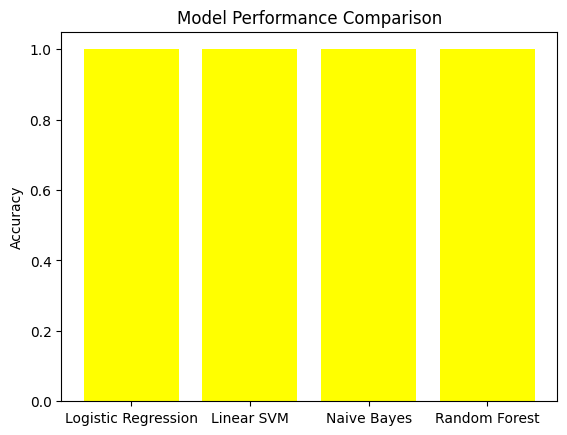

In [42]:
#model performance comparison
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color='yellow')
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.show()


In [43]:
#final evaluation
import joblib
best_model = LinearSVC()
best_model.fit(X_train_tfidf, y_train)
joblib.dump(best_model, "consumer_complaint_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [44]:
# Load model and vectorizer
loaded_model = joblib.load("consumer_complaint_model.pkl")
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")

# Example prediction
sample = ["The bank kept calling about a loan I don’t have"]
sample_tfidf = loaded_tfidf.transform(sample)
print(loaded_model.predict(sample_tfidf))


[2.]
